#### 28.04.25, &copy; Vus Feodosiy  KI-21-1

# Лабораторна робота №7. Методи кластеризації

__Мета__: закріпити на практиці концепцію байєсівського вивода засобами мови Python

## Що ви будете вміти?
* Реалізовувати алгоритм кластеризації `k`-means засобами мови Python
* Реалізовувати агоритм кластеризації DBSCAN засобами мови Python
* Реалізувати агоритми ієрархічної кластеризації засобами мови Python

## Завдання для самостійної роботи 

1. Розглянути наведені вище приклади.

2. Реалізувати всі алгоритми кластеризації, наведені в роботі, для свого варіанта, обгрунтувавши знаення відповідних параметрів.

*Реалізація алгоритму кластеризації `k`-means засобами мови Python*

K-Means збігся на ітерації 4


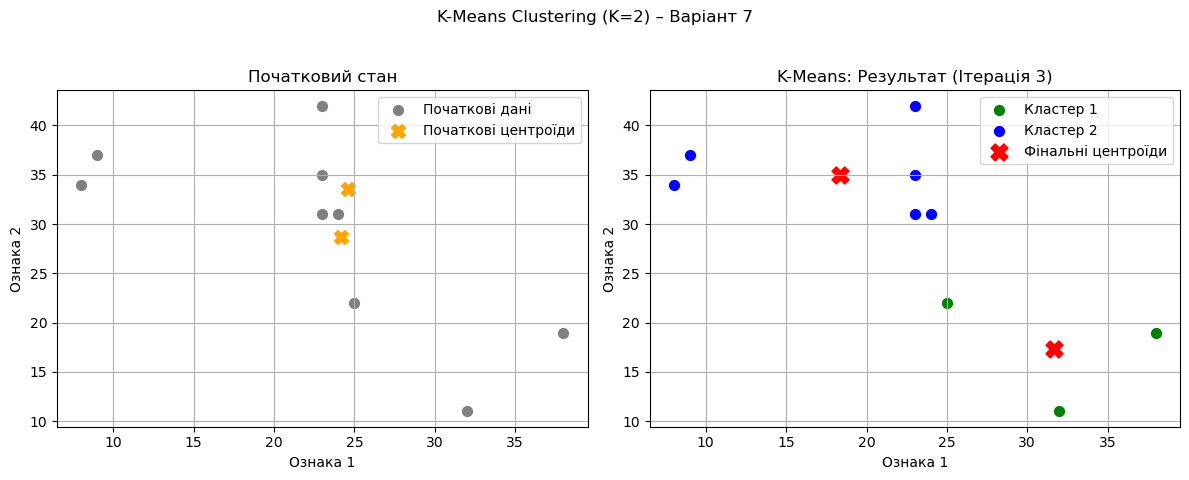

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Дані варіанту 7
x_train_7 = np.array([
    [23, 31],
    [25, 22],
    [32, 11],
    [8, 34],
    [24, 31],
    [9, 37],
    [23, 35],
    [23, 42],
    [38, 19]
])

x = x_train_7
K = 2  # Кількість кластерів

M = np.mean(x, axis=0)
D = np.var(x, axis=0)

np.random.seed(42)
ma = [np.random.normal(M, np.sqrt(D / 10), 2) for _ in range(K)]

ro = lambda x_vect, m_vect: np.mean((np.array(x_vect) - np.array(m_vect)) ** 2)

COLORS = ('green', 'blue', 'brown', 'black')

plt.figure(figsize=(12, 5))
plt.suptitle("K-Means Clustering (K=2) – Варіант 7")

# Початковий стан
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1], s=50, color='gray', label='Початкові дані')
plt.scatter([m[0] for m in ma], [m[1] for m in ma], s=100, color='orange', marker='X', label='Початкові центроїди')
plt.title("Початковий стан")
plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.legend()
plt.grid(True)

# Ітерації K-Means
max_iterations = 10
n = 0
previous_ma = None

while n < max_iterations:
    X = [[] for _ in range(K)]
    for x_vect in x:
        r = [ro(x_vect, m) for m in ma]
        X[np.argmin(r)].append(x_vect)

    new_ma = []
    for i in range(K):
        if len(X[i]) > 0:
            new_ma.append(np.mean(X[i], axis=0))
        else:
            print(f"Попередження: Кластер {i} порожній на ітерації {n+1}. Зберігаємо попередній центроїд.")
            new_ma.append(ma[i])

    if previous_ma is not None and np.allclose(np.array(ma), np.array(new_ma)):
        print(f"K-Means збігся на ітерації {n+1}")
        ma = new_ma
        break

    previous_ma = ma
    ma = new_ma
    n += 1
else:
    print(f"K-Means завершив роботу після {max_iterations} ітерацій.")

# Фінальний розподіл
plt.subplot(1, 2, 2)
final_X = [[] for _ in range(K)]
for x_vect in x:
    r = [ro(x_vect, m) for m in ma]
    final_X[np.argmin(r)].append(x_vect)

for i in range(K):
    if len(final_X[i]) > 0:
        xx = np.array(final_X[i]).T
        plt.scatter(xx[0], xx[1], s=50, color=COLORS[i], label=f'Кластер {i+1}')

mx = [m[0] for m in ma]
my = [m[1] for m in ma]
plt.scatter(mx, my, s=150, color='red', marker='X', label='Фінальні центроїди')
plt.title(f"K-Means: Результат (Ітерація {n})")
plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.legend()
plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


*   `K` (кількість кластерів): Найважливіший параметр. Оскільки надані мітки `y_train_1` містять два унікальних значення (`1` та `-1`), це є сильним індикатором того, що дані можуть природно розділятися на 2 кластери. Тому `K=2` є найбільш логічним вибором.
*   `ma` (початкові центроїди): Ініціалізація випадковими точками, згенерованими з нормального розподілу навколо середнього значення даних з невеликою дисперсією (`np.sqrt(D / 10)`), є стандартним методом, що допомагає уникнути поганого старту алгоритму (наприклад, коли всі центроїди опиняються в одному місці). `np.random.seed(42)` додано для відтворюваності результатів.
*   `ro` (метрика відстані): Евклідова відстань (у коді реалізовано як середнє квадратів різниць) є стандартною для K-Means, оскільки алгоритм прагне мінімізувати саме суму квадратів евклідових відстаней точок до центроїдів їх кластерів.
*   `max_iterations`: Встановлено на `10`. Для такого малого набору даних це часто достатньо для збіжності. Додано також перевірку на збіжність (коли центроїди перестають змінюватися).


*Реалізація агоритму кластеризації DBSCAN засобами мови Python*


--- Алгоритм DBSCAN (Варіант 7) ---


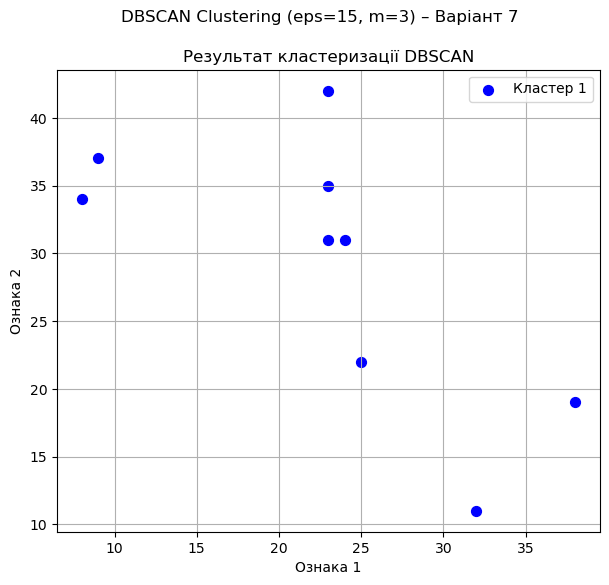

Знайдено кластерів (включаючи шум, якщо є): 1
Знайдено реальних кластерів: 1
  Кластер 1 (ID: 0): 9 точок


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import hypot
from itertools import cycle

print("\n--- Алгоритм DBSCAN (Варіант 7) ---")

# Дані варіанту 7
x_train_7 = np.array([
    [23, 31],
    [25, 22],
    [32, 11],
    [8, 34],
    [24, 31],
    [9, 37],
    [23, 35],
    [23, 42],
    [38, 19]
])
P = [tuple(row) for row in x_train_7.tolist()]

# Параметри DBSCAN
eps = 15
m = 3
distance_func = lambda p1, p2: hypot(p1[0] - p2[0], p1[1] - p2[1])

# Простий варіант DBSCAN
def dbscan_naive_corrected(P, eps, m, distance):
    NOISE = -1
    UNCLASSIFIED = -2
    point_to_cluster = {point: UNCLASSIFIED for point in P}
    cluster_id = 0
    clusters = {}

    def region_query(p, P_list):
        return [q for q in P_list if p != q and distance(p, q) < eps]

    def expand_cluster(p, neighbours, current_cluster_id, P_list):
        clusters[current_cluster_id] = [p]
        point_to_cluster[p] = current_cluster_id

        i = 0
        while i < len(neighbours):
            q = neighbours[i]
            i += 1

            if point_to_cluster[q] == UNCLASSIFIED:
                point_to_cluster[q] = current_cluster_id
                clusters[current_cluster_id].append(q)
                q_neighbours = region_query(q, P_list)
                if len(q_neighbours) >= m:
                    for nq in q_neighbours:
                        if point_to_cluster[nq] in [UNCLASSIFIED, NOISE] and nq not in neighbours[i:]:
                            neighbours.append(nq)
            elif point_to_cluster[q] == NOISE:
                point_to_cluster[q] = current_cluster_id
                clusters[current_cluster_id].append(q)

    P_list = list(P)
    for p in P_list:
        if point_to_cluster[p] != UNCLASSIFIED:
            continue

        neighbours = region_query(p, P_list)
        if len(neighbours) < m:
            point_to_cluster[p] = NOISE
        else:
            expand_cluster(p, neighbours, cluster_id, P_list)
            cluster_id += 1

    final_clusters = {}
    noise_points = []
    for point, cid in point_to_cluster.items():
        if cid in [NOISE, UNCLASSIFIED]:
            noise_points.append(point)
        else:
            final_clusters.setdefault(cid, []).append(point)

    output_clusters = {}
    if noise_points:
        output_clusters[NOISE] = noise_points

    sorted_cluster_ids = sorted(final_clusters.keys())
    for i, old_cid in enumerate(sorted_cluster_ids):
        output_clusters[i] = final_clusters[old_cid]

    return output_clusters

# Запуск DBSCAN
clusters_dbscan = dbscan_naive_corrected(P, eps, m, distance_func)

# Візуалізація результату
plt.figure(figsize=(7, 6))
plt.suptitle(f"DBSCAN Clustering (eps={eps}, m={m}) – Варіант 7")

cluster_colors = cycle('bgrcmyk')
colors_map = {}
cluster_ids_present = sorted([cid for cid in clusters_dbscan if cid != -1])

for cluster_id, points in clusters_dbscan.items():
    if not points:
        continue

    X_coords = [p[0] for p in points]
    Y_coords = [p[1] for p in points]

    if cluster_id == -1:
        color = 'black'
        label = 'Шум (Noise)'
        marker = 'x'
        size = 30
    else:
        if cluster_id not in colors_map:
            color_idx = cluster_ids_present.index(cluster_id) % len('bgrcmyk')
            colors_map[cluster_id] = 'bgrcmyk'[color_idx]
        color = colors_map[cluster_id]
        label = f'Кластер {cluster_ids_present.index(cluster_id) + 1}'
        marker = 'o'
        size = 50

    plt.scatter(X_coords, Y_coords, c=color, label=label, marker=marker, s=size)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title("Результат кластеризації DBSCAN")
plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.grid(True)
plt.show()

# Вивід інформації
print(f"Знайдено кластерів (включаючи шум, якщо є): {len(clusters_dbscan)}")
num_real_clusters = len([cid for cid in clusters_dbscan if cid != -1])
print(f"Знайдено реальних кластерів: {num_real_clusters}")
if -1 in clusters_dbscan:
    print(f"  Шум: {len(clusters_dbscan[-1])} точок")

sorted_real_cids = sorted([cid for cid in clusters_dbscan if cid != -1])
for i, cid in enumerate(sorted_real_cids):
    print(f"  Кластер {i+1} (ID: {cid}): {len(clusters_dbscan[cid])} точок")


*   `eps` (радіус околу): Цей параметр визначає, наскільки близько мають бути точки, щоб вважатися сусідами. Його вибір критичний. Проаналізувавши відстані між точками даних (див. коментарі в коді), видно, що відстані всередині потенційних груп (наприклад, точки біля `(25,30)` або біля `(20,45)`) значно менші (до ~15), ніж відстані між цими групами (>40). Тому значення `eps = 15` виглядає обґрунтованим: воно достатньо велике, щоб об'єднати точки всередині щільних областей, але недостатньо велике, щоб об'єднати різні щільні області.
*   `m` (MinPts): Мінімальна кількість точок в `eps`-околі для того, щоб точка вважалася основною (core point). Загальне правило — `m >= D+1` (де `D` — розмірність). Для 2D даних це означає `m >= 3`. Оскільки датасет дуже малий (10 точок), вибір `m = 3` є доречним. Він вимагає, щоб щонайменше 3 точки (включаючи саму точку) були близько одна до одної для формування щільного регіону.
*   `distance`: Використовується стандартна евклідова відстань (`hypot`).

*Реалізація агоритму ієрархічної кластеризації засобами мови Python*


--- Ієрархічна агломеративна кластеризація (Варіант 7) ---


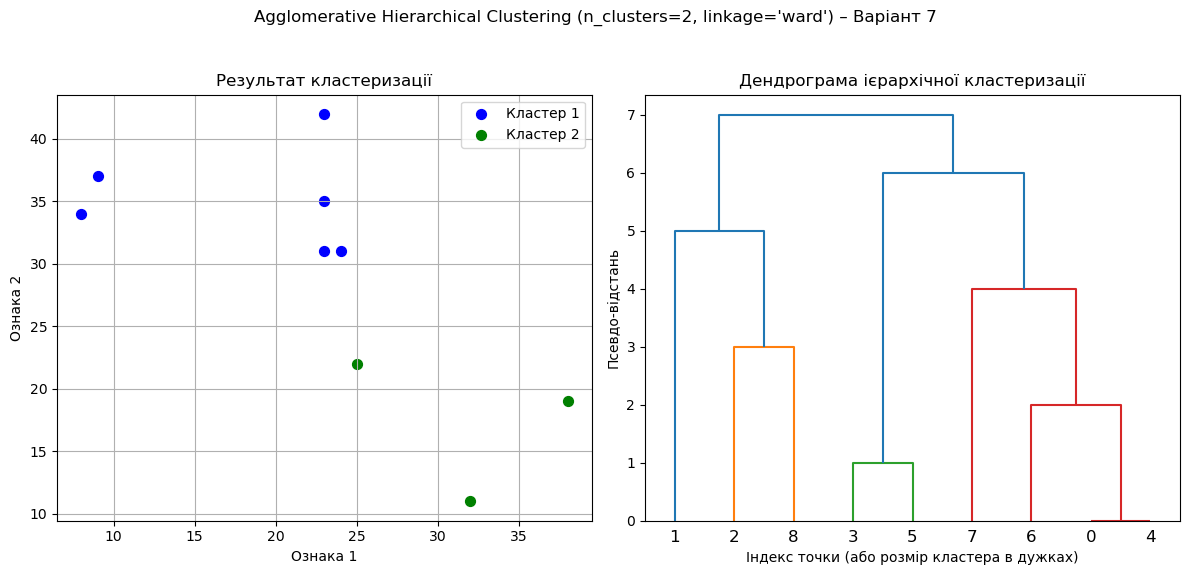

Мітки кластерів для кожної точки: [0 1 1 0 0 0 0 0 1]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from itertools import cycle

print("\n--- Ієрархічна агломеративна кластеризація (Варіант 7) ---")

# Навчальні дані – варіант 7
x_train_7 = np.array([
    [23, 31],
    [25, 22],
    [32, 11],
    [8, 34],
    [24, 31],
    [9, 37],
    [23, 35],
    [23, 42],
    [38, 19]
])

x_hier = x_train_7
NC = 2  # Кількість кластерів
linkage_method = "ward"

clustering_agg = AgglomerativeClustering(n_clusters=NC, linkage=linkage_method)
cluster_labels = clustering_agg.fit_predict(x_hier)

# Функція для побудови дендрограми
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_,
                                      np.arange(model.children_.shape[0]),
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

# Візуалізація
plt.figure(figsize=(12, 6))
plt.suptitle(f"Agglomerative Hierarchical Clustering (n_clusters={NC}, linkage='{linkage_method}') – Варіант 7")

# Графік кластеризації
ax1 = plt.subplot(1, 2, 1)
colors_agg = cycle('bgrcmyk')
for i in range(NC):
    points_in_cluster = x_hier[cluster_labels == i]
    ax1.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1],
                s=50, color=next(colors_agg), label=f'Кластер {i+1}')
ax1.set_title("Результат кластеризації")
ax1.set_xlabel("Ознака 1")
ax1.set_ylabel("Ознака 2")
ax1.legend()
ax1.grid(True)

# Дендрограма
ax2 = plt.subplot(1, 2, 2)
plot_dendrogram(clustering_agg, ax=ax2)
ax2.set_title("Дендрограма ієрархічної кластеризації")
ax2.set_xlabel("Індекс точки (або розмір кластера в дужках)")
ax2.set_ylabel("Псевдо-відстань")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print(f"Мітки кластерів для кожної точки: {cluster_labels}")



*   `n_clusters` (`NC`): Кількість кластерів, яку ми хочемо отримати в результаті. Як і для K-Means, виходячи з наданих міток `y_train_1`, `NC = 2` є найбільш виправданим вибором. Дендрограма також може допомогти підтвердити цей вибір (шукаючи рівень, де розріз дає бажану кількість вертикальних ліній).
*   `linkage`: Стратегія об'єднання кластерів. Вибрано `'ward'`, оскільки він прагне мінімізувати дисперсію всередині кожного кластера і часто дає компактні, сферичні кластери, що є розумним припущенням за відсутності іншої інформації про структуру даних. Це поширений і часто ефективний метод.
*   `affinity`: Метрика відстані. Для `linkage='ward'` за замовчуванням використовується `'euclidean'`, що є стандартним вибором і відповідає метрикам, які використовуються в інших алгоритмах.

3. Дати відповіді на контрольні запитання.

4. Відправити результати роботи у файлі lab_7_StudentLastName.ipynb до віддаленого репозиторію на GіtHub

## Контрольні питання

*1. У чому полягає задача кластеризації та які її цілі?*

**Задача кластеризації** полягає в розділенні набору даних (об'єктів) на групи, які називаються **кластерами**.

**Основні характеристики та цілі:**

*   **Навчання без вчителя:** Кластеризація не використовує заздалегідь відомих міток чи категорій.
*   **Пошук структури:** Мета — виявити приховану, природну структуру або закономірності в даних.
*   **Групування за схожістю:** Об'єкти всередині одного кластера мають бути максимально **схожими** між собою (за певною метрикою).
*   **Розмежування груп:** Об'єкти з **різних** кластерів мають бути максимально **відмінними** один від одного.
*   **Результат:** На виході отримуємо розподіл об'єктів за кластерами.

*2. Які критерії використовуються для оцінки якості розбиття об’єктів на групи у задачі кластеризації?*

Якість розбиття на кластери оцінюють за допомогою критеріїв, які можна поділити на дві основні групи:

1.  **Внутрішні критерії (Internal Criteria):**
    *   Базуються **лише на даних та результатах кластеризації** (без "правильних" міток).
    *   Оцінюють **компактність** кластерів (наскільки близькі об'єкти всередині) та **відокремленість** між кластерами (наскільки далекі кластери один від одного).
    *   *Приклади:* Силуетний коефіцієнт (Silhouette Coefficient), індекс Девіса-Болдіна (Davies-Bouldin Index), індекс Калінскі-Харабаза (Calinski-Harabasz Index).

2.  **Зовнішні критерії (External Criteria):**
    *   Використовуються, коли існують **"еталонні" мітки класів** (ground truth).
    *   Порівнюють отримані кластери з цими еталонними мітками, оцінюючи ступінь відповідності.
    *   *Приклади:* Скоригований індекс Ренда (Adjusted Rand Index - ARI), Нормалізована взаємна інформація (Normalized Mutual Information - NMI), Гомогенність (Homogeneity), Повнота (Completeness), V-міра (V-measure).

*3. Що таке задача часткового навчання в контексті кластеризації? У чому полягає ідея алгоритму k-середніх (k-means)? У чому полягаєновна ідея алгоритму DBSCAN.*

*   **Задача часткового навчання (Semi-Supervised Learning) в контексті кластеризації:**
    *   Це підхід, що поєднує елементи навчання **без вчителя** (кластеризація) та **з вчителем**.
    *   Використовується, коли є **невелика кількість** міток або іншої апріорної інформації (наприклад, знання, що певні пари об'єктів *мають* бути в одному кластері — "must-link", або *не можуть* бути — "cannot-link").
    *   **Мета:** Використати цю обмежену інформацію для покращення якості кластеризації порівняно з повністю некерованим підходом.

*   **Ідея алгоритму k-середніх (k-means):**
    *   **Мета:** Розділити дані на `k` (заздалегідь задану кількість) кластерів.
    *   **Основна ідея:** Ітеративний процес:
        1.  **Ініціалізація:** Вибрати `k` початкових центрів кластерів (центроїдів).
        2.  **Призначення:** Кожну точку даних віднести до кластера, центр якого є найближчим (зазвичай за евклідовою відстанню).
        3.  **Оновлення:** Перерахувати позицію кожного центроїда як середнє арифметичне всіх точок, віднесених до цього кластера.
        4.  **Повторення:** Кроки 2 і 3 повторюються доти, доки центроїди не перестануть суттєво змінювати своє положення (збіжність).
    *   Прагне мінімізувати суму квадратів відстаней від точок до центроїдів їхніх кластерів.

*   **Основна ідея алгоритму DBSCAN:**
    *   **Мета:** Знаходити кластери довільної форми на основі **щільності** розподілу точок.
    *   **Основна ідея:**
        1.  Кластер визначається як область з високою щільністю точок, відокремлена від інших таких областей областями з низькою щільністю.
        2.  Використовує два параметри: `eps` (максимальна відстань між сусідами) та `MinPts` (мінімальна кількість сусідів в `eps`-околі для того, щоб точка вважалася **основною** - core point).
        3.  Кластери формуються шляхом розширення від основних точок до всіх **досяжних за щільністю** точок (інших основних або **граничних** точок, які є сусідами основних).
        4.  Точки, що не належать жодному кластеру, вважаються **шумом**.
    *   Не потребує заздалегідь задавати кількість кластерів.

*4. Як можна скористатися засобами бібліотеки scikit-learn для реалізації алгоритму DBSCAN на Python?*

In [33]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([
    [10, 50],
    [20, 30],
    [25, 30],
    [20, 60],
    [15, 70],
    [40, 40],
    [30, 45],
    [20, 45],
    [40, 30],
    [7, 35]
])
model = DBSCAN(eps=40, min_samples=3)
labels = model.fit_predict(X)
print(labels)



[0 0 0 0 0 0 0 0 0 0]
